Analisis exploratorio.

para iniciar con el analisis, vamos a ahcer seguimiento al KPI propuesto.


In [1]:
# importamos las librerias que vamos necesitando durante el proceso.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
#traemos nuestro archivo csv.
aa=pd.read_csv('avis.csv',sep='|',encoding='utf-8')

In [3]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              4991 non-null   object 
 1   hora               3492 non-null   object 
 2   pais               4991 non-null   object 
 3   operadora          4981 non-null   object 
 4   vuelo_numero       1325 non-null   object 
 5   ruta               4242 non-null   object 
 6   tipo_aeronave      4991 non-null   object 
 7   registro_aeronave  189 non-null    float64
 8   abordo             4991 non-null   int64  
 9   pasajeros          4787 non-null   float64
 10  tripulantes        4789 non-null   float64
 11  bajas              4991 non-null   int64  
 12  bajas_pasajeros    4770 non-null   float64
 13  bajas_tripulacion  4771 non-null   float64
 14  bajas_tierra       4959 non-null   float64
 15  Descripcion        4940 non-null   object 
dtypes: float64(6), int64(2),

In [4]:
aa.shape

(4991, 16)

In [5]:
columnas_a_eliminar = ["hora", "vuelo_numero", "registro_aeronave",'Descripcion']
aa = aa.drop(columnas_a_eliminar, axis=1)

# formatizo bien la fecha
aa['fecha'] = pd.to_datetime(aa['fecha'])

#las columnas a números
columnas_numericas = ['abordo', 'pasajeros', 'tripulantes', 'bajas', 'bajas_pasajeros', 'bajas_tripulacion', 'bajas_tierra']
aa[columnas_numericas] = aa[columnas_numericas].fillna(0).astype(int)

In [6]:
aa.head()

,fecha,pais,operadora,ruta,tipo_aeronave,abordo,pasajeros,tripulantes,bajas,bajas_pasajeros,bajas_tripulacion,bajas_tierra
0,1908-09-17,other,Military US Army,Demonstration,Wright Brothers,2,1,1,1,1,0,0
1,1909-09-07,France,NaN,Air show,Wright Brothers,1,0,1,1,0,0,0
2,1912-07-12,other,Military US Navy,Test flight,other,5,0,5,5,0,5,0
3,1913-08-06,Canada,Private,NaN,other,1,0,1,1,0,1,0
4,1913-09-09,other,Military German Navy,NaN,other,20,0,0,14,0,0,0


In [7]:
aa['abordo'].dropna()

0        2
1        1
2        5
3        1
4       20
        ..
4986     6
4987    11
4988    14
4989    96
4990    28
Name: abordo, Length: 4991, dtype: int64

In [8]:
'''aa.to_csv('hame.csv',sep='|',encoding='utf-8',index=False)'''

ahora si estamos listos para los graficos.


In [8]:
# Tasa de Fatalidad de la Tripulación
aa['tasa_fatalidad_tripulacion'] = round(aa['bajas_tripulacion'] / aa['abordo'], 2)

# Tasa de Supervivencia de Pasajeros
aa['tasa_supervivencia_pasajeros'] = round((aa['abordo'] - aa['bajas_pasajeros']) / aa['abordo'], 2)


In [9]:
# para esto importamos matplotlib.
# Filtrar datos por década anterior (por ejemplo, 2011-2020)
decada_anterior = aa[(aa['fecha'] >= '2011-01-01') & (aa['fecha'] <= '2020-12-31')]

# Filtrar datos por última década (por ejemplo, 2021-2030)
ultima_decada = aa[(aa['fecha'] >= '2021-01-01') & (aa['fecha'] <= '2030-12-31')]

# Calcular la tasa de fatalidad de la tripulación para ambas décadas
tasa_fatalidad_anterior = decada_anterior['tasa_fatalidad_tripulacion'].mean()
tasa_fatalidad_ultima = ultima_decada['tasa_fatalidad_tripulacion'].mean()


In [10]:
disminucion_porcentaje = ((tasa_fatalidad_anterior - tasa_fatalidad_ultima) / tasa_fatalidad_anterior) * 100

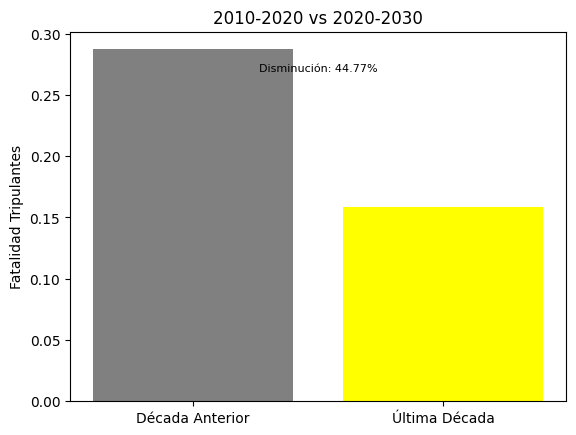

In [11]:
#Crear un gráfico de barras para visualizar las tasas de fatalidad
fig, ax = plt.subplots()
decadas = ['Década Anterior', 'Última Década']
tasas = [tasa_fatalidad_anterior, tasa_fatalidad_ultima]

ax.bar(decadas, tasas, color=['grey', 'yellow'])
ax.set_ylabel('Fatalidad Tripulantes')
ax.set_title('2010-2020 vs 2020-2030')

# Mostrar el porcentaje de disminución en el gráfico
plt.text(0.5, 0.9, f'Disminución: {disminucion_porcentaje:.2f}%', ha='center', va='center', transform=ax.transAxes, fontsize=8)

# Mostrar el gráfico
plt.show()

Tasa de mortalidad de tripulantes de las ultimas dos decadas:
se puede observar una disminucion de '44.70% de lña tasa de mortalidad en comparacion a la decada anterior (si no tenemos en cuenta que vamos en  1/3 de la decada).
esto me hace pensar en tres puntos.
    1. la tasa de mortalidad para el 2030 va a ser superior a la de la dacada anterior (se puede prevenir este resultado)
    2. es probable que haya temporadas entre las epocas con mas riesgo de accidentes(debido fenomenos naturales o demas causas externas), (esto podria prevenirse).
    3. es cada dia mas peligroso trabajar en este sector?.



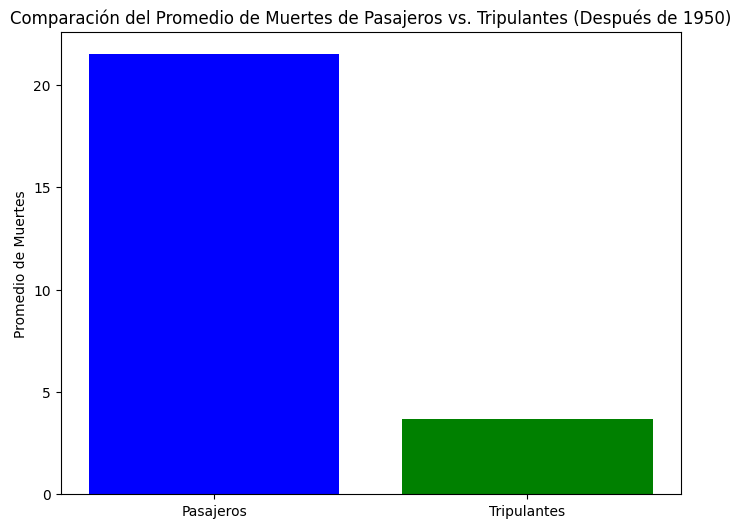

In [12]:
start_date = '1950-01-01'
filtered_data = aa[aa['fecha'] >= start_date]

# Calcular el promedio de muertes de pasajeros y tripulantes
promedio_muertes_pasajeros = filtered_data['bajas_pasajeros'].mean()
promedio_muertes_tripulantes = filtered_data['bajas_tripulacion'].mean()

# Crear un gráfico de barras para comparar los promedios
plt.figure(figsize=(8, 6))
plt.bar(['Pasajeros', 'Tripulantes'], [promedio_muertes_pasajeros, promedio_muertes_tripulantes], color=['blue', 'green'])
plt.title('Comparación del Promedio de Muertes de Pasajeros vs. Tripulantes (Después de 1950)')
plt.ylabel('Promedio de Muertes')
plt.show()

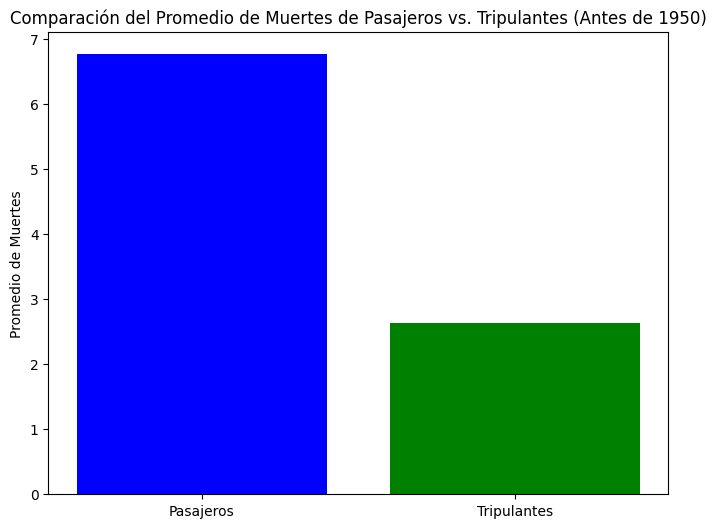

In [13]:
end_date = '1950-01-01'
filtered_data = aa[aa['fecha'] < end_date]

# Calcular el promedio de muertes de pasajeros y tripulantes
promedio_muertes_pasajeros = filtered_data['bajas_pasajeros'].mean()
promedio_muertes_tripulantes = filtered_data['bajas_tripulacion'].mean()

# Crear un gráfico de barras para comparar los promedios
plt.figure(figsize=(8, 6))
plt.bar(['Pasajeros', 'Tripulantes'], [promedio_muertes_pasajeros, promedio_muertes_tripulantes], color=['blue', 'green'])
plt.title('Comparación del Promedio de Muertes de Pasajeros vs. Tripulantes (Antes de 1950)')
plt.ylabel('Promedio de Muertes')
plt.show()

quise hacer este par de graficos para fijarme en la diferencia en la tasa de fatalidad antes y despues de 1950.
antes era mucho mas peligroso ser tripulante, aunque comparado con la historia ps se justifica debido a las muchas bajas muchas veces por cuestiones militares contra servicios de mensajeria.

In [14]:
aa



,fecha,pais,operadora,ruta,tipo_aeronave,abordo,pasajeros,tripulantes,bajas,bajas_pasajeros,bajas_tripulacion,bajas_tierra,tasa_fatalidad_tripulacion,tasa_supervivencia_pasajeros
0,1908-09-17,other,Military US Army,Demonstration,Wright Brothers,2,1,1,1,1,0,0,0.00,0.50
1,1909-09-07,France,NaN,Air show,Wright Brothers,1,0,1,1,0,0,0,0.00,1.00
2,1912-07-12,other,Military US Navy,Test flight,other,5,0,5,5,0,5,0,1.00,1.00
3,1913-08-06,Canada,Private,NaN,other,1,0,1,1,0,1,0,1.00,1.00
4,1913-09-09,other,Military German Navy,NaN,other,20,0,0,14,0,0,0,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,2021-03-28,other,Soloy Helicopters,Sightseeing Charter,other,6,5,1,5,4,1,0,0.17,0.33
4987,2021-05-21,Nigeria,Military Nigerian Air Force,NaN,Beechcraft,11,7,4,11,7,4,0,0.36,0.36
4988,2021-06-10,Myanmar,Military Myanmar Air Force,Naypyidaw Anisakan,Beechcraft,14,12,2,12,11,1,0,0.07,0.21
4989,2021-07-04,Philippines,Military Philippine Air Force,Cagayan de OroLumbia Jolo,Lockheed Martin,96,88,8,50,0,0,3,0.00,1.00


In [15]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   fecha                         4991 non-null   datetime64[ns]
 1   pais                          4991 non-null   object        
 2   operadora                     4981 non-null   object        
 3   ruta                          4242 non-null   object        
 4   tipo_aeronave                 4991 non-null   object        
 5   abordo                        4991 non-null   int64         
 6   pasajeros                     4991 non-null   int64         
 7   tripulantes                   4991 non-null   int64         
 8   bajas                         4991 non-null   int64         
 9   bajas_pasajeros               4991 non-null   int64         
 10  bajas_tripulacion             4991 non-null   int64         
 11  bajas_tierra                  